# Venn Diagrams

Reviewing my LinkedIn profile, it occurred to me that my varied work background probably makes it difficult for others to quickly understand my skillset. I decided to use Venn diagrams to create a visual aid.
Initially a 4-set Venn diagram was created using the `venn` package, but even early attempts proved too confusing to visually interpret.
A complete 3-set diagram was made instead using `matplotlib_venn`.

## Load

In [1]:
import pylab as plt
%matplotlib inline

In [2]:
# Create the data sets by going through LinkedIn profile

experience = {
    "Data Science": {
        "Intuety", "Pepper Money", "GreenPen", "FindAPharmacist",
    },
    "Management": {
        "Cynon Pharmacy", "Tesco Pharmacy", "FindAPharmacist",
    },
    "Finance": {
        "GreenPen", "Pepper Money", "Royal London",
    },
    "Healthcare": {
        "GreenPen",
        "Cynon Pharmacy",
        "Tesco Pharmacy",
        "FindAPharmacist",
        "Locum Pharmacist",
    },
}

qualifications = {
    "Data Science": {
        "PgDip Data & AI", "CertHE Maths", "PRINCE2 Agile", "DataCamp"
    },
    "Management": {
        "PRINCE2 Agile"
    },
    "Finance": {
        "MSc in Finance",
        "CFA Level I",
    },
    "Healthcare": {
        "Master of Pharmacy",
    },
}

In [3]:
# Create combined qualifications and experience object
exp_qual = dict()

for field in set(list(experience.keys()) + list(qualifications.keys())):
    exp_qual[field] = set.union(experience[field], qualifications[field])

exp_qual = dict(sorted(exp_qual.items())) # Sort alphabetically

## 4-Set Models

<AxesSubplot:>

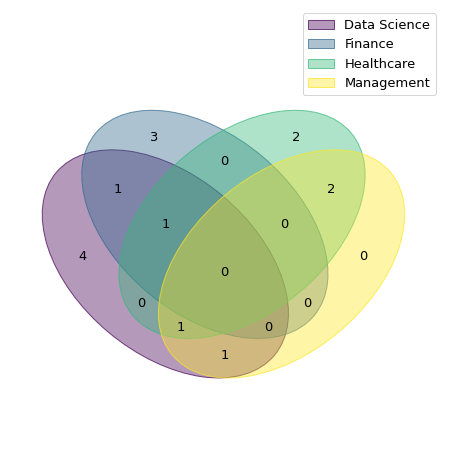

In [4]:
from venn import venn, generate_petal_labels, draw_venn, generate_colors

# Draw an initial diagram
venn(exp_qual)

<AxesSubplot:>

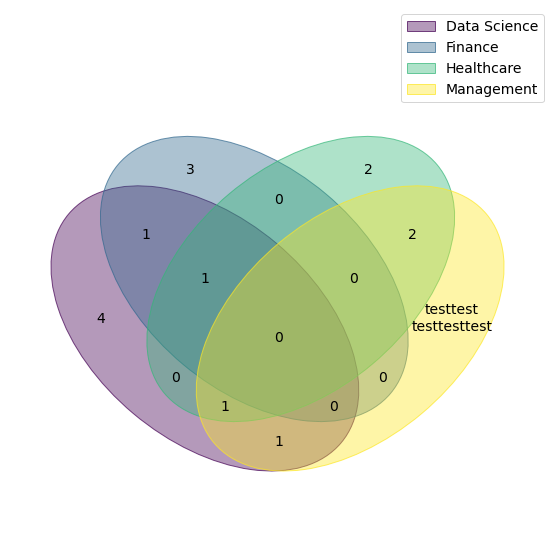

In [5]:
petal_labels = generate_petal_labels(exp_qual.values(), fmt="{size}")
petal_labels['0001'] = ('test'*2 + '\n' + 'test'*3)
draw_venn(
    petal_labels=petal_labels, dataset_labels=exp_qual.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=4),
    figsize=(14, 10), fontsize=14, legend_loc="best", ax=None
)

The 4-set models don't seem very clear to look at. The diagram is too busy, and the combination of ellipses and 4 colours make it less intuitive to interpret. As I also want each point to be labelled with the set's text, the amount of text I want to include would be impractical on this diagram. Progress on this will be stopped at this point to attempt a 3-set model.

## 3-Set Models

### Experience and Qualifications

#### Create 3-sets from 4-sets

In [6]:
def sets_3_from_4(orig4, to_combine = ['Finance', 'Management']):
    """Return dictionary of 3 sets from 4 sets"""
    new3 = dict()
    new_field = ' & '.join(to_combine)
    new3[new_field] = set()

    for field in set(list(orig4.keys())):
        if field in to_combine:
            new3[new_field] = set.union(orig4[field], new3[new_field])
        else:
            new3[field] = orig4[field]
    return new3

In [7]:
exp_qual3 = sets_3_from_4(exp_qual)
exp_qual3 = dict(sorted(exp_qual3.items())) # Sort alphabetically

# Rename new field, and rearrange sets
exp_qual3["Business & Finance"] = exp_qual3.pop("Finance & Management")
exp_qual3["Healthcare"] = exp_qual3.pop("Healthcare") # Ensures this category is the third circle
exp_qual3

{'Data Science': {'CertHE Maths',
  'DataCamp',
  'FindAPharmacist',
  'GreenPen',
  'Intuety',
  'PRINCE2 Agile',
  'Pepper Money',
  'PgDip Data & AI'},
 'Business & Finance': {'CFA Level I',
  'Cynon Pharmacy',
  'FindAPharmacist',
  'GreenPen',
  'MSc in Finance',
  'PRINCE2 Agile',
  'Pepper Money',
  'Royal London',
  'Tesco Pharmacy'},
 'Healthcare': {'Cynon Pharmacy',
  'FindAPharmacist',
  'GreenPen',
  'Locum Pharmacist',
  'Master of Pharmacy',
  'Tesco Pharmacy'}}

#### Create all intersections of sets

In [8]:
def create_intersects(data_dict) -> dict:
    """Return text strings for each point on the diagram"""

    # Get separate sets from dictionary object
    def dict_vals(x): return list(data_dict.values())[x]
    A = dict_vals(0)
    B = dict_vals(1)
    C = dict_vals(2)

    # Code adapted from https://towardsdatascience.com/professional-venn-diagrams-in-python-638abfff39cc
    AB_overlap = A & B  # Find intersection of set A & set B
    AC_overlap = A & C
    BC_overlap = B & C
    ABC_overlap = A & B & C
    A_rest = A - AB_overlap - AC_overlap
    B_rest = B - AB_overlap - BC_overlap
    C_rest = C - AC_overlap - BC_overlap
    AB_only = AB_overlap - ABC_overlap
    AC_only = AC_overlap - ABC_overlap
    BC_only = BC_overlap - ABC_overlap

    inter_dict = dict()
    inter_dict['ABC_overlap'] = ABC_overlap
    inter_dict['A_rest'] = A_rest
    inter_dict['B_rest'] = B_rest
    inter_dict['C_rest'] = C_rest
    inter_dict['AB_only'] = AB_only
    inter_dict['AC_only'] = AC_only
    inter_dict['BC_only'] = BC_only

    return inter_dict

In [9]:
eq3 = create_intersects(exp_qual3)
eq3

{'ABC_overlap': {'FindAPharmacist', 'GreenPen'},
 'A_rest': {'CertHE Maths', 'DataCamp', 'Intuety', 'PgDip Data & AI'},
 'B_rest': {'CFA Level I', 'MSc in Finance', 'Royal London'},
 'C_rest': {'Locum Pharmacist', 'Master of Pharmacy'},
 'AB_only': {'PRINCE2 Agile', 'Pepper Money'},
 'AC_only': set(),
 'BC_only': {'Cynon Pharmacy', 'Tesco Pharmacy'}}

#### Calculate Venn sizes

In [10]:
# Specify circle references
circ_to_cat = dict()
circ_to_cat['100'] = 'A_rest'
circ_to_cat['010'] = 'B_rest'
circ_to_cat['001'] = 'C_rest'
circ_to_cat['110'] = 'AB_only'
circ_to_cat['101'] = 'AC_only'
circ_to_cat['011'] = 'BC_only'
circ_to_cat['111'] = 'ABC_overlap'
circ_to_cat

{'100': 'A_rest',
 '010': 'B_rest',
 '001': 'C_rest',
 '110': 'AB_only',
 '101': 'AC_only',
 '011': 'BC_only',
 '111': 'ABC_overlap'}

In [11]:
from collections import Counter

def calc_venn_sizes(intersects):
    """Calculate relative sizes of Venn circles based on quantity of data in each"""
    venn_sizes = Counter()
    for entry in circ_to_cat.items():
        venn_sizes[entry[0]] = len(intersects[entry[1]])
    return venn_sizes

In [12]:
venn_sizes = calc_venn_sizes(eq3)
venn_sizes

Counter({'100': 4, '010': 3, '001': 2, '110': 2, '101': 0, '011': 2, '111': 2})

#### Diagram parameters & helpers

In [13]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib.pyplot import figure

# Specify diagram parameters
plt.rcParams["figure.figsize"] = (18,18)
plt.rcParams["font.size"] = 30

# Override size calculation by counter
# venn_sizes = [4,3,2,2,1,2,1]
venn_sizes = [3,3,1,3,1,1,2]

# Colours of sets
broad_colours = ('orangered', 'dodgerblue', 'limegreen')

In [14]:
# Helper functions for diagram creation
def get_text(set_text, rev=True):
    """Convert list to text string ready for Venn diagram"""
    list_text = list(set_text)
    if rev==True: list_text.reverse() # Reverse list if desired
    list_text = '\n'.join(list_text)
    return list_text

def change_venn_param(param, colour=None, x=None, y=None):
    # Change intersection colours
    if colour != None:
        v.get_patch_by_id(param).set_color(colour)
    # Adjust positions of labels
    if x != None:
        v.get_label_by_id(param).set_x(x)
    if y != None:
        v.get_label_by_id(param).set_y(y)

def set_venn_pars(intersects):
    """Set parameters for all Venn diagrams"""
   
    # Label each intersection appropriately
    for entry in circ_to_cat.items():
        v.get_label_by_id(entry[0]).set_text(get_text(intersects[entry[1]]))
    
    # Set custom parameters
    change_venn_param('100', x=-0.38, y=+0.21)
    change_venn_param('010', x=+0.38, y=+0.21)
    change_venn_param('001', y=-0.43)
    change_venn_param('110', colour='mediumorchid')
    change_venn_param('101', colour='darkgoldenrod', y=-0.18)
    change_venn_param('011', colour='lightsteelblue', x=+0.25, y=-0.20)
    change_venn_param('111', colour='gold')
        
    # Change text font properties
    for i, text in enumerate(v.set_labels): # outer labels
        text.set_fontsize(26)
        text.set_fontweight('bold')
        text.set_color(broad_colours[i])

    for text in v.subset_labels: # inner labels
        text.set_fontsize(24)

#### Build diagram

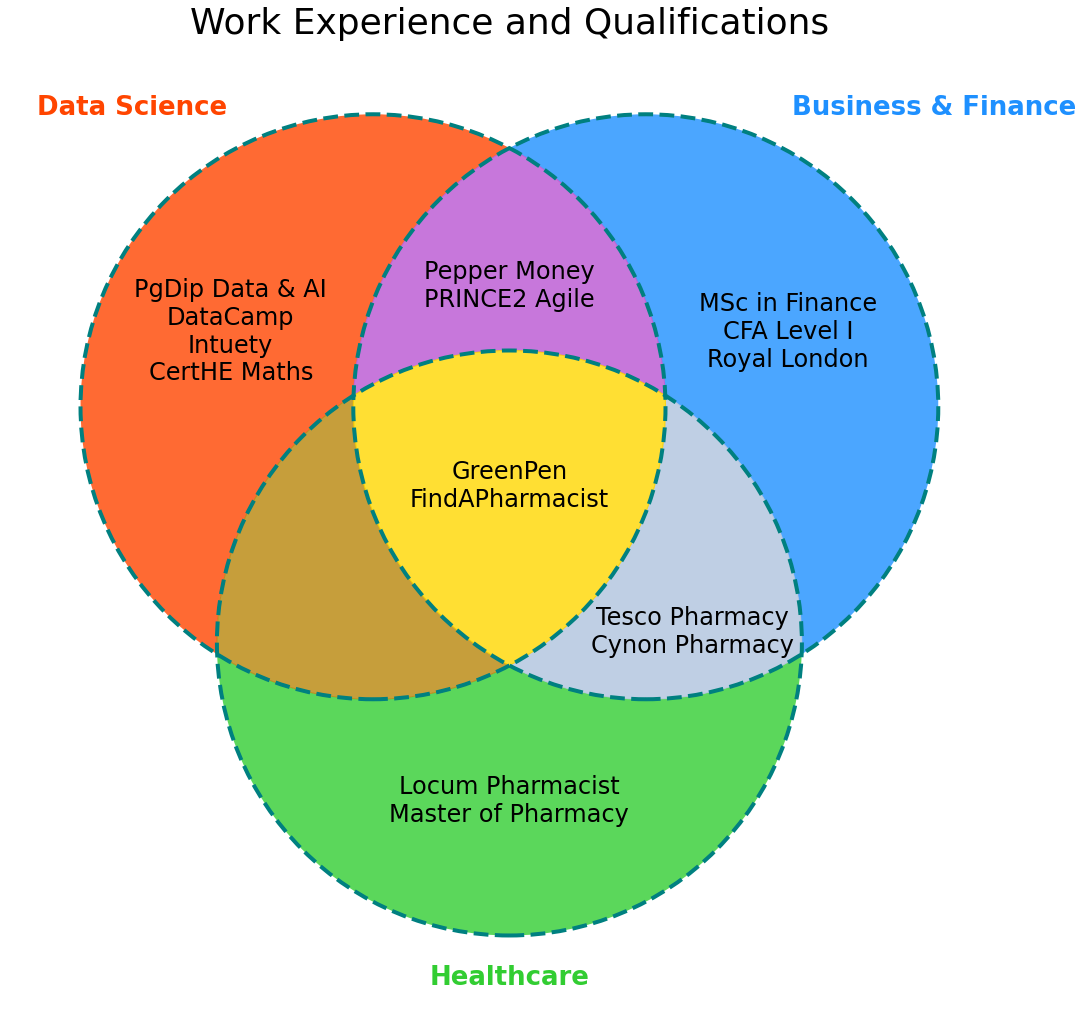

In [15]:
# Build venn diagram
v = venn3(
    subsets = venn_sizes,
    set_labels = list(exp_qual3.keys()),
    set_colors = broad_colours,
    alpha = 0.8
)
c = venn3_circles(subsets = venn_sizes, linestyle='dashed', linewidth=4, color='teal') # Overlay diagram with borders

set_venn_pars(eq3)
plt.title("Work Experience and Qualifications")
plt.show()

### Work Experience only

In [16]:
# Create 3-sets
exp3 = sets_3_from_4(experience)
exp3 = dict(sorted(exp3.items())) # Sort alphabetically
exp3

{'Data Science': {'FindAPharmacist', 'GreenPen', 'Intuety', 'Pepper Money'},
 'Finance & Management': {'Cynon Pharmacy',
  'FindAPharmacist',
  'GreenPen',
  'Pepper Money',
  'Royal London',
  'Tesco Pharmacy'},
 'Healthcare': {'Cynon Pharmacy',
  'FindAPharmacist',
  'GreenPen',
  'Locum Pharmacist',
  'Tesco Pharmacy'}}

In [17]:
# Create all intersections of sets
e3 = create_intersects(exp3)
e3

{'ABC_overlap': {'FindAPharmacist', 'GreenPen'},
 'A_rest': {'Intuety'},
 'B_rest': {'Royal London'},
 'C_rest': {'Locum Pharmacist'},
 'AB_only': {'Pepper Money'},
 'AC_only': set(),
 'BC_only': {'Cynon Pharmacy', 'Tesco Pharmacy'}}

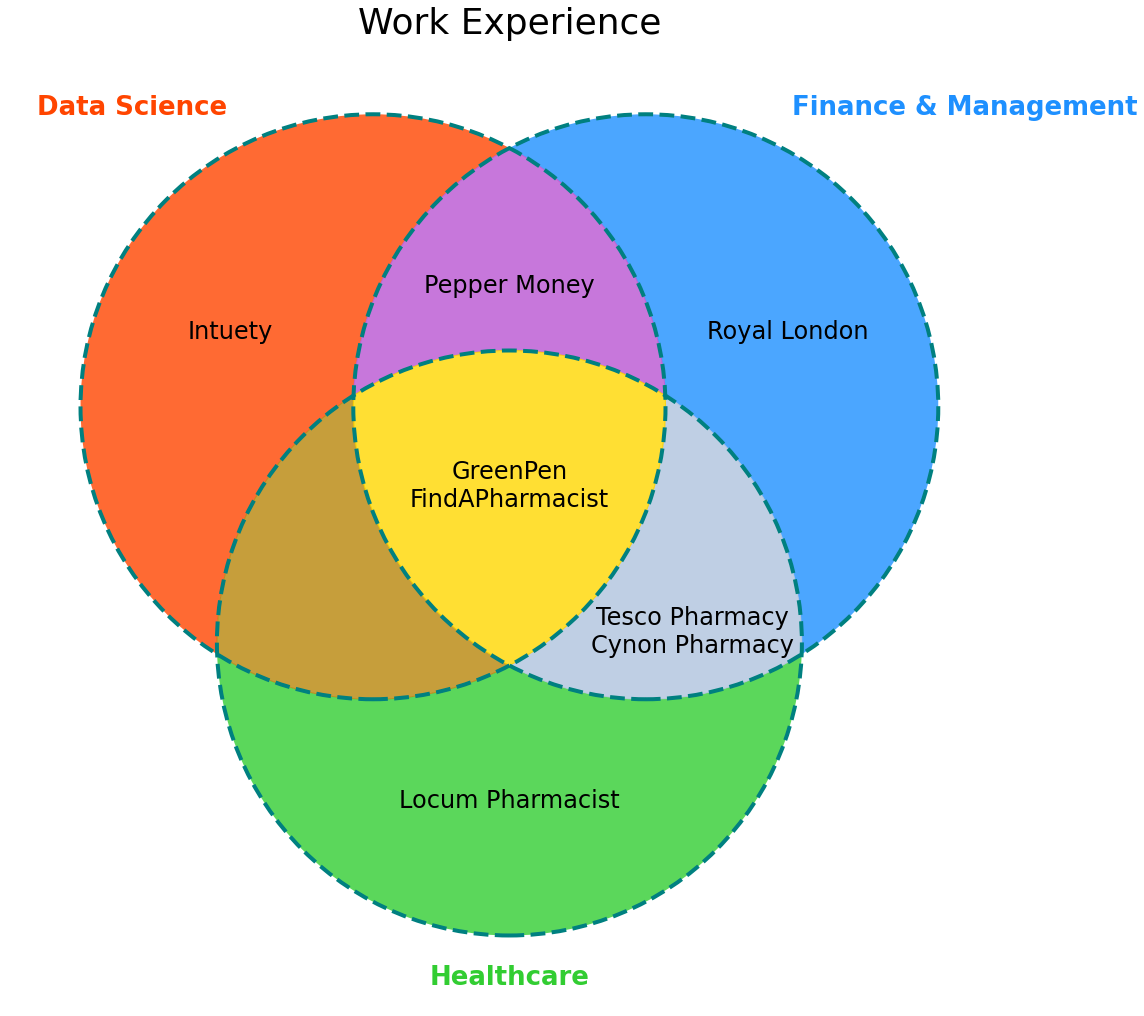

In [18]:
# Create venn diagram with borders
v = venn3(
    subsets = venn_sizes,
    set_labels = list(exp3.keys()),
    set_colors = broad_colours,
    alpha = 0.8
)
c = venn3_circles(subsets = venn_sizes, linestyle='dashed', linewidth=4, color='teal')

set_venn_pars(e3)    
plt.title("Work Experience")
plt.show()

### Qualifications only

For completeness, a diagram of qualifications alone is created. This is useful to demonstrate the effort saved from writing functions earlier in the notebook.

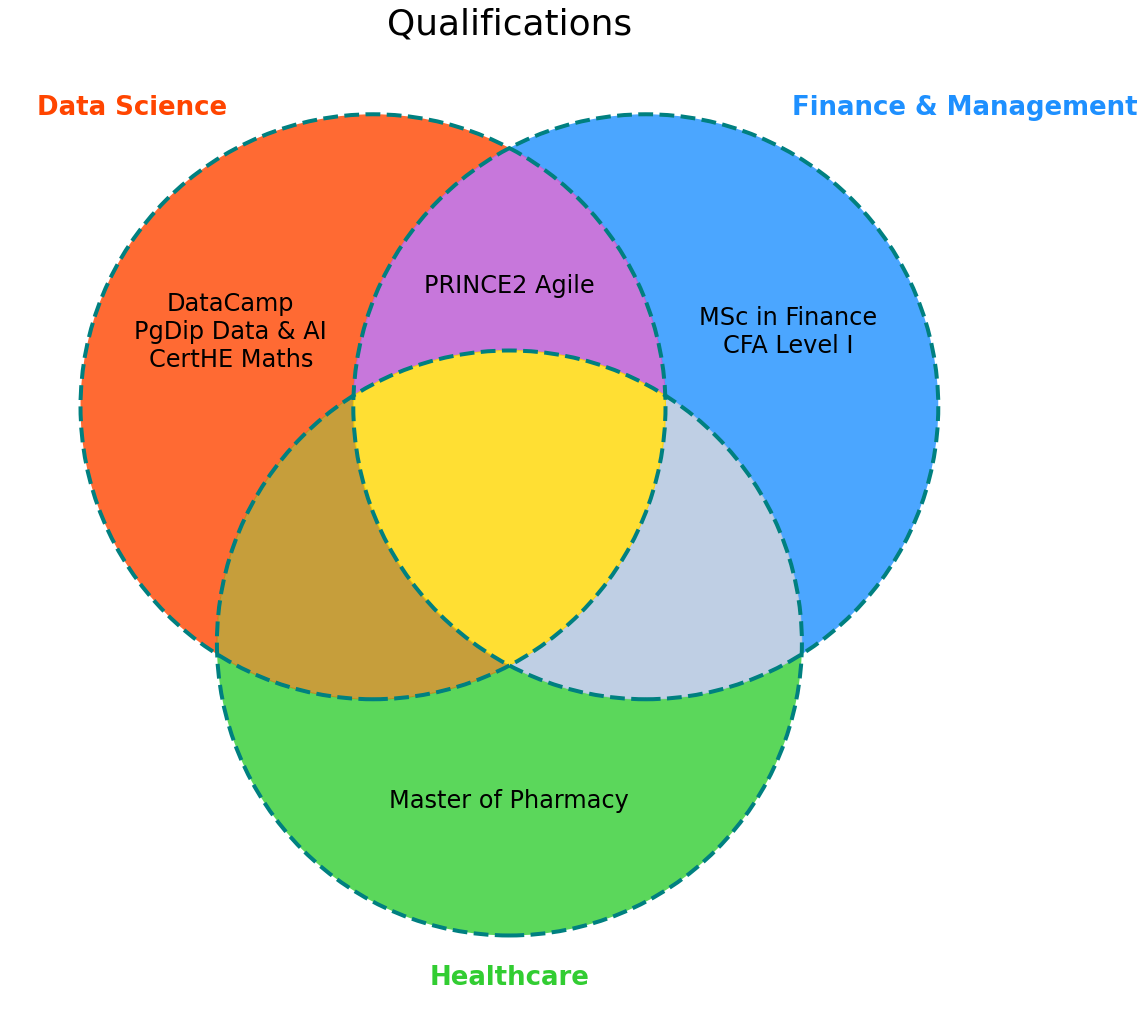

In [19]:
# Create 3 sets
qual3 = sets_3_from_4(qualifications)
# Order the sets
qual3 = dict(sorted(qual3.items()))
# Create the diagram
v = venn3(
    subsets = venn_sizes,
    set_labels = list(qual3.keys()),
    set_colors = broad_colours,
    alpha = 0.8
)
# Add borders to the circles
c = venn3_circles(subsets = venn_sizes, linestyle='dashed', linewidth=4, color='teal')
# Find the intersect text
q3 = create_intersects(qual3)
# Set the parameters to match
set_venn_pars(q3)    
plt.title("Qualifications")
plt.show()

In [20]:
q3

{'ABC_overlap': set(),
 'A_rest': {'CertHE Maths', 'DataCamp', 'PgDip Data & AI'},
 'B_rest': {'CFA Level I', 'MSc in Finance'},
 'C_rest': {'Master of Pharmacy'},
 'AB_only': {'PRINCE2 Agile'},
 'AC_only': set(),
 'BC_only': set()}